In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data.dataloader import DataLoader

from torchvision.utils import make_grid

import torch.nn as nn
import torch.nn.functional as F

import numpy as np

## Data load

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '/home/projects/bagon/ingap')

100%|██████████| 135107811/135107811 [00:07<00:00, 17979456.43it/s]


## Data Extract

In [3]:
with tarfile.open('/home/projects/bagon/ingap/cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='/home/projects/bagon/ingap/cifar10_data')

## Data visualization

In [5]:
data_dir = '/home/projects/bagon/ingap/cifar10_data/cifar10'

In [6]:
classes = os.listdir(data_dir + "/train")
print(classes)

['automobile', 'frog', 'truck', 'horse', 'ship', 'cat', 'dog', 'bird', 'deer', 'airplane']


In [7]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))

No. of training examples for airplanes: 5000


In [8]:
airplane_files_test = os.listdir(data_dir + "/test/airplane")
print('No. of training examples for airplanes TEST:', len(airplane_files_test))

No. of training examples for airplanes TEST: 1000


In [9]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0223.png', '0127.png', '0853.png', '0517.png', '0701.png']


In [84]:
from torchvision.transforms import Compose
from torchvision import transforms

# https://medium.com/swlh/how-data-augmentation-improves-your-cnn-performance-an-experiment-in-pytorch-and-torchvision-e5fb36d038fb

train_transform = Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize([0, 0, 0], [1, 1, 1])
])

#transforms.Normalize(mean, std), 3- for each channel

test_transform = Compose([
    transforms.ToTensor(),
    transforms.Normalize([0, 0, 0], [1, 1, 1])
])

dataset_aug = ImageFolder(data_dir+'/train', transform=train_transform)
dataset_test_aug = ImageFolder(data_dir+'/test', transform=test_transform)



In [226]:
dataset_tensor = ImageFolder(data_dir+'/train', transform=ToTensor())

In [10]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [11]:
dataset_test = ImageFolder(data_dir+'/test', transform=ToTensor())

In [12]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [13]:
dataset.classes[label]

'airplane'

In [14]:
img.size()

torch.Size([3, 32, 32])

In [15]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [16]:
print(dataset_test.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [17]:
# '#ffffff' => representing a color in the RGB (Red, Green, Blue) color system
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [18]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "(" + str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    # convert torch.Size([3, 32, 32]) to torch.Size([32, 32, 3])

In [19]:
def show_class(data,start_index):
  img, label = data[start_index]
  print(dataset.classes[label])
  plt.figure(figsize=(11, 4))
  for i in range(start_index, start_index+10):
    img, label = data[i]
    
    plt.subplot(1,10,i+1-start_index)
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))
  plt.show()

## Images of training set

airplane


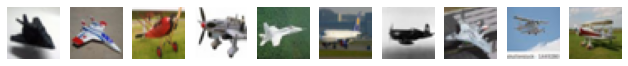

automobile


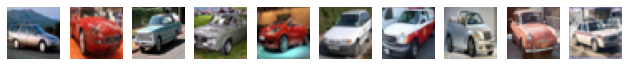

bird


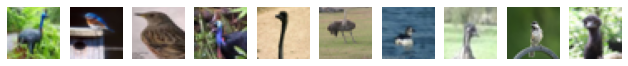

cat


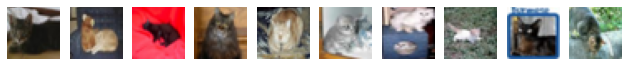

deer


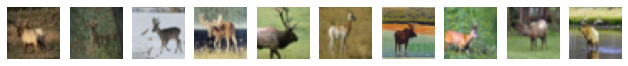

dog


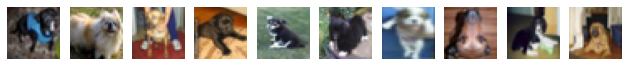

frog


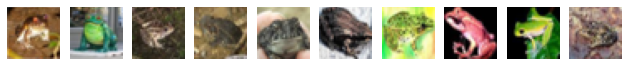

horse


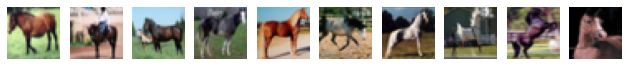

ship


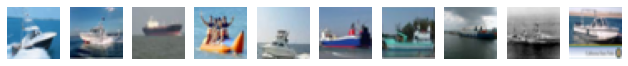

truck


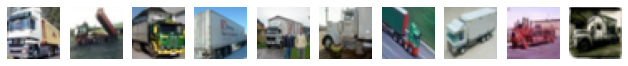

In [20]:
for i in range (0,50000,5000):
  show_class(dataset,i)

## Images of trest set

airplane


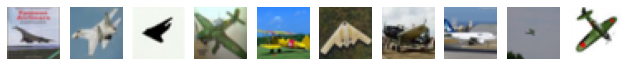

automobile


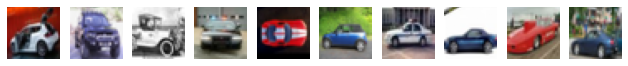

bird


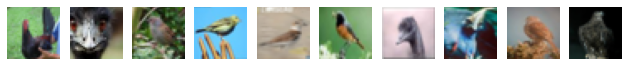

cat


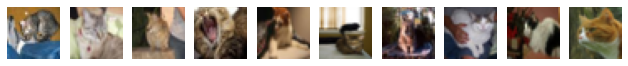

deer


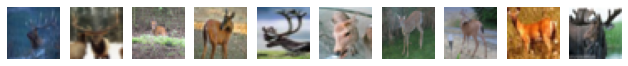

dog


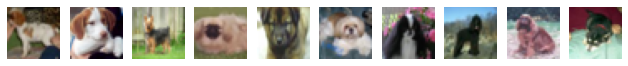

frog


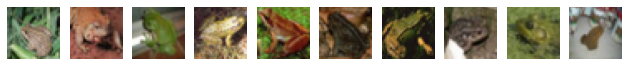

horse


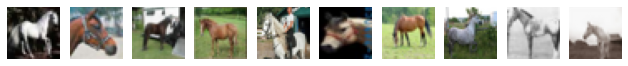

ship


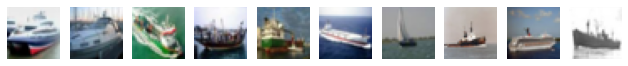

truck


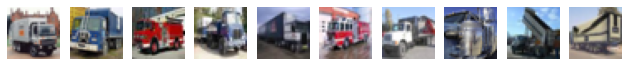

In [21]:
for i in range (0,10000,1000):
  show_class(dataset_test,i)

## Augmentation

https://albumentations.ai/docs/getting_started/image_augmentation/

Label:  ship (8)


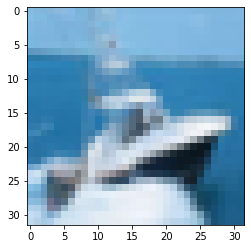

In [22]:
show_example(*dataset[40000])

In [24]:
import albumentations as A
import cv2

In [26]:
transform = A.Compose([
    A.RandomCrop(width=32, height=32),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "(" + str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    # convert torch.Size([3, 32, 32]) to torch.Size([32, 32, 3])

In [35]:
type(img.permute(1, 2, 0).numpy())

numpy.ndarray

In [37]:
img.permute(1, 2, 0).numpy().shape

(32, 32, 3)

In [39]:
img, label = dataset[40000]
img2 = img.permute(1, 2, 0).numpy()
img2.shape

(32, 32, 3)

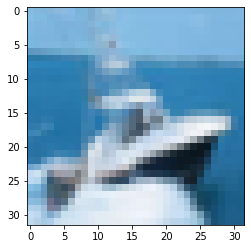

In [115]:
plt.imshow(img2)

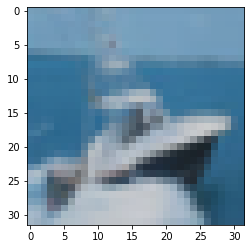

In [49]:
transform = A.Compose([
A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.5, p=3)
])

transformed_img = transform(image=img2)["image"]
plt.imshow(transformed_img)

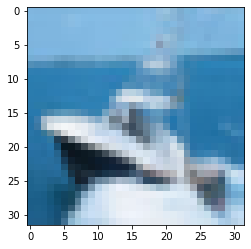

In [50]:
transform = A.Compose([
A.HorizontalFlip(p=0.5)
])

transformed_img = transform(image=img2)["image"]
plt.imshow(transformed_img)

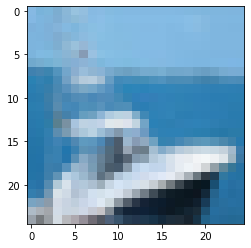

In [55]:
transform = A.Compose([
A.RandomCrop(width=25, height=25),
])

transformed_img = transform(image=img2)["image"]
plt.imshow(transformed_img)

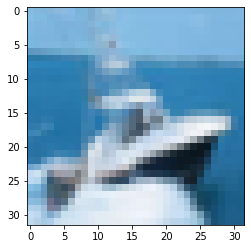

In [56]:
plt.imshow(img2)

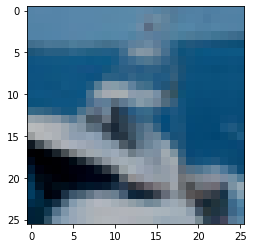

In [80]:
transform = A.Compose([
A.RandomCrop(width=26, height=26),
A.HorizontalFlip(p=0.5),
A.RandomBrightnessContrast(brightness_limit=0.9, contrast_limit=0.2, p=3)
])

transformed_img = transform(image=img2)["image"]
plt.imshow(transformed_img)

## Kornia 

In [130]:
import kornia as K

In [117]:
from kornia.augmentation import (
    CenterCrop,
    ColorJiggle,
    ColorJitter,
    PadTo,
    RandomAffine,
    RandomBoxBlur,
    RandomBrightness,
    RandomChannelShuffle,
    RandomContrast,
    RandomCrop,
    RandomCutMixV2,
    RandomElasticTransform,
    RandomEqualize,
    RandomErasing,
    RandomFisheye,
    RandomGamma,
    RandomGaussianBlur,
    RandomGaussianNoise,
    RandomGrayscale,
    RandomHorizontalFlip,
    RandomHue,
    RandomInvert,
    RandomJigsaw,
    RandomMixUpV2,
    RandomMosaic,
    RandomMotionBlur,
    RandomPerspective,
    RandomPlanckianJitter,
    RandomPlasmaBrightness,
    RandomPlasmaContrast,
    RandomPlasmaShadow,
    RandomPosterize,
    RandomResizedCrop,
    RandomRGBShift,
    RandomRotation,
    RandomSaturation,
    RandomSharpness,
    RandomSolarize,
    RandomThinPlateSpline,
    RandomVerticalFlip,
)

In [ ]:
# https://kornia.readthedocs.io/en/latest/applications/image_classification.html
# https://kornia.readthedocs.io/en/latest/augmentation.html

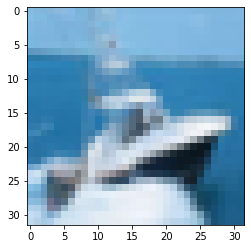

In [116]:
plt.imshow(img2)

In [ ]:
#https://kornia.github.io/tutorials/nbs/data_augmentation_2d.html

Label:  ship (8)


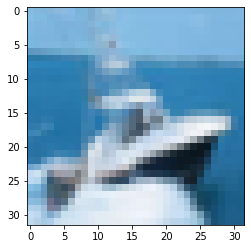

In [119]:
show_example(*dataset[40000])

In [120]:
randomplanckianjitter = RandomPlanckianJitter("blackbody", same_on_batch=False, keepdim=False, p=1.0)

In [122]:
img, label = dataset[40000]
transformed_img = randomplanckianjitter(img)

In [123]:
transformed_img.size()

torch.Size([1, 3, 32, 32])

In [126]:
transformed_img[0,:,:,:].size()

torch.Size([3, 32, 32])

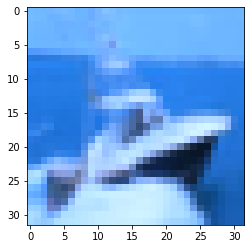

In [127]:
plt.imshow(transformed_img[0,:,:,:].permute(1, 2, 0))

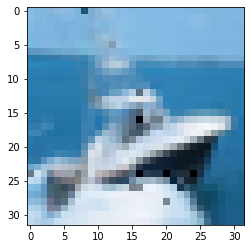

In [128]:
randomplasmashadow = RandomPlasmaShadow(
    roughness=(0.1, 0.7), shade_intensity=(-1.0, 0.0), shade_quantity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0
)
transformed_img = randomplasmashadow(img)
plt.imshow(transformed_img[0,:,:,:].permute(1, 2, 0))

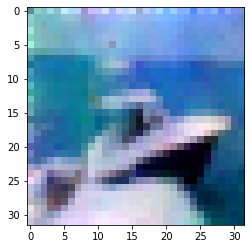

In [129]:
randomplasmabrightness = RandomPlasmaBrightness(
    roughness=(0.1, 0.7), intensity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0
)
transformed_img = randomplasmabrightness(img)
plt.imshow(transformed_img[0,:,:,:].permute(1, 2, 0))

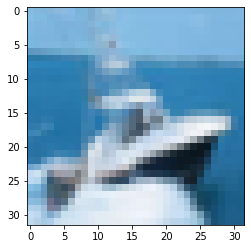

In [157]:
img, label = dataset[40000]
img2 = img.permute(1, 2, 0).numpy()
img2.shape

plt.imshow(img2)

In [174]:
def visual_kornia(aug_method,img):
    plt.figure(figsize=(11, 4))
    plt.subplot(1,2,1)
    plt.imshow(img2)

    transformed_img = aug_method(img)
    plt.subplot(1,2,2)
    plt.imshow(transformed_img[0,:,:,:].permute(1, 2, 0))

In [160]:
# https://kornia.readthedocs.io/en/latest/augmentation.html
# https://kornia.github.io/tutorials/nbs/data_augmentation_2d.html

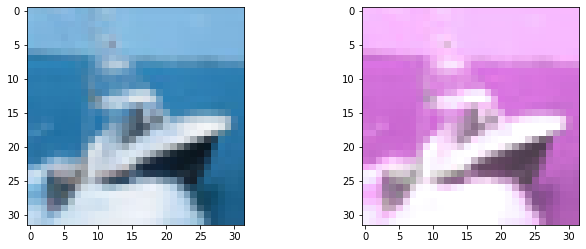

In [173]:
colorjiggle = ColorJiggle(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0)
img, label = dataset[40000]
visual_kornia(colorjiggle,img)

In [201]:
# RandomPerspective

# ColorJiggle
colorjiggle = ColorJiggle(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0)

# RandomAffine
randomaffine = RandomAffine(
    (-15.0, 5.0),
    (0.3, 1.0),
    (0.4, 1.3),
    0.5,
    resample="nearest",
    padding_mode="reflection",
    align_corners=True,
    same_on_batch=False,
    keepdim=False,
    p=1.0,
)

# RandomVerticalFlip
randomverticalflip = RandomVerticalFlip(same_on_batch=False, keepdim=False, p=0.6, p_batch=1.0)

# RandomHorizontalFlip
randomhorizontalflip = RandomHorizontalFlip(same_on_batch=False, keepdim=False, p=0.7)

# RandomRotate
randomrotation = RandomRotation(15.0, "nearest", align_corners=True, same_on_batch=False, keepdim=False, p=1.0)

# RandomCrop
randomcrop = RandomCrop(
    (150, 150),
    10,
    True,
    1,
    "constant",
    "nearest",
    cropping_mode="resample",
    same_on_batch=False,
    align_corners=True,
    keepdim=False,
    p=1.0,
)

# RandomErasing
randomerasing = RandomErasing(scale=(0.02, 0.33), ratio=(0.3, 3.3), value=1, same_on_batch=False, keepdim=False, p=1.0)

# RandomGrayscale
randomgrayscale = RandomGrayscale(same_on_batch=False, keepdim=False, p=1.0)

# RandomResizedCrop
randomresizedcrop = RandomResizedCrop(
    (200, 200),
    (0.4, 1.0),
    (2.0, 2.0),
    "nearest",
    align_corners=True,
    cropping_mode="resample",
    same_on_batch=False,
    keepdim=False,
    p=1.0,
)

# CenterCrop
centercrop = CenterCrop(25, resample="nearest", cropping_mode="resample", align_corners=True, keepdim=False, p=1.0)

In [199]:
img, label = dataset[40000]

colorjiggle


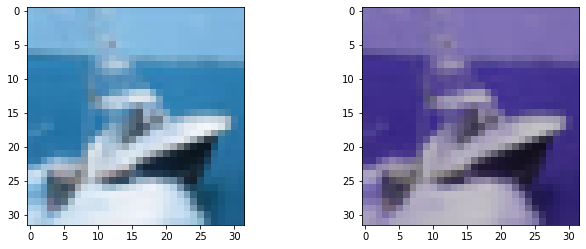

In [182]:
###################################################################################################
print('colorjiggle')
visual_kornia(colorjiggle,img)

randomaffine


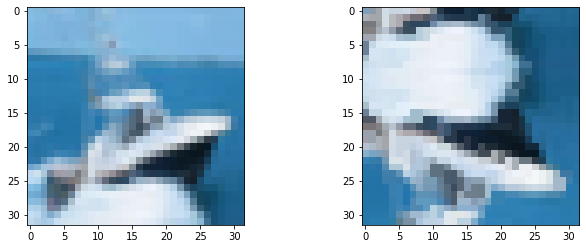

In [183]:
###################################################################################################
print('randomaffine')
visual_kornia(randomaffine,img)

randomverticalflip


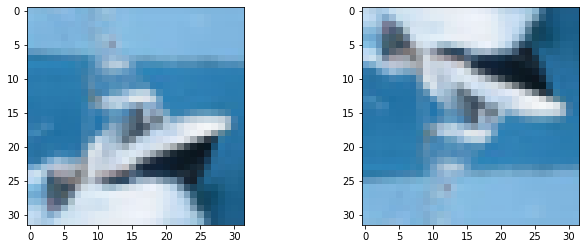

In [187]:
###################################################################################################
print('randomverticalflip')
visual_kornia(randomverticalflip,img)


randomhorizontalflip


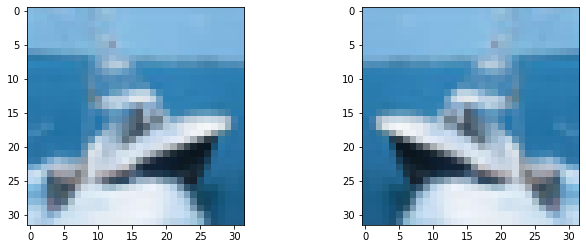

In [188]:
###################################################################################################
print('randomhorizontalflip')
visual_kornia(randomhorizontalflip,img)


randomrotation


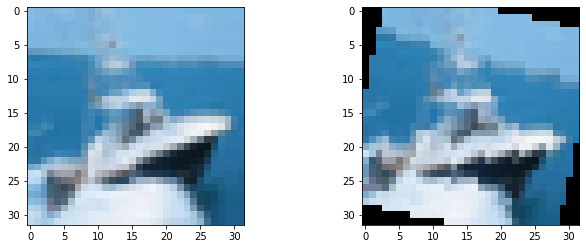

In [190]:
###################################################################################################
print('randomrotation')
visual_kornia(randomrotation,img)


randomcrop


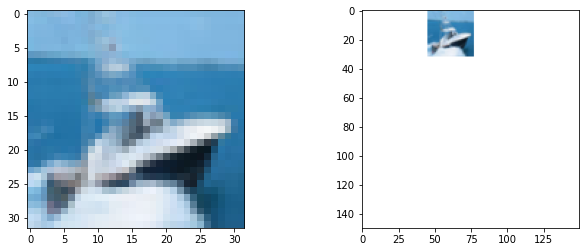

In [191]:
###################################################################################################
print('randomcrop')
visual_kornia(randomcrop,img)


randomerasing


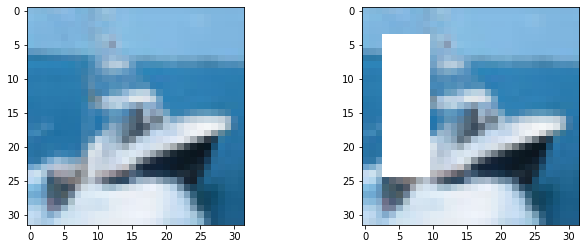

In [192]:
###################################################################################################
print('randomerasing')
visual_kornia(randomerasing,img)


randomgrayscale


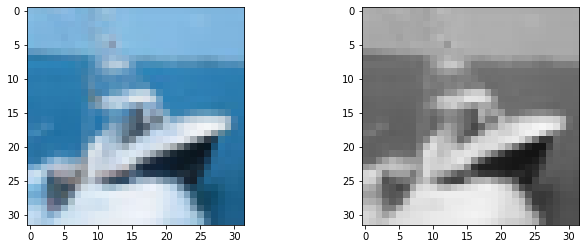

In [193]:
###################################################################################################
print('randomgrayscale')
visual_kornia(randomgrayscale,img)


randomresizedcrop


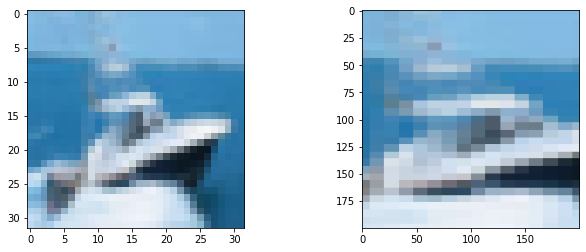

In [194]:
###################################################################################################
print('randomresizedcrop')
visual_kornia(randomresizedcrop,img)


centercrop


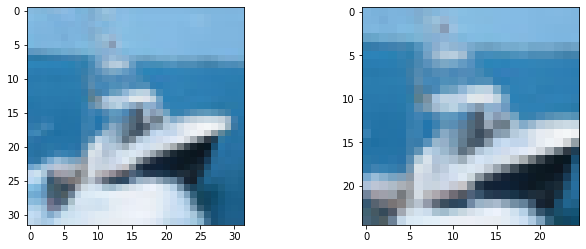

In [202]:
###################################################################################################
print('centercrop')
visual_kornia(centercrop,img)
###################################################################################################

### sequesnce of kornia

In [203]:
transforms = nn.Sequential(
    colorjiggle,
    randomaffine, 
    randomverticalflip, 
    randomhorizontalflip, 
    randomrotation, 
    randomerasing, 
    randomgrayscale, 
    randomresizedcrop, 
    centercrop
)

In [219]:
transforms_korina = nn.Sequential(
    colorjiggle,
    randomhorizontalflip,
    randomgrayscale,
    randomresizedcrop
)

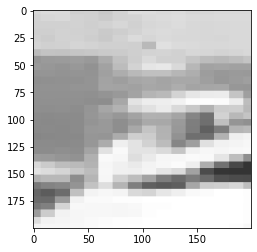

In [220]:
transformed_img = transforms_korina(img)
plt.imshow(transformed_img[0,:,:,:].permute(1, 2, 0))

In [232]:
#https://www.kaggle.com/code/tallesviana/basic-pytorch-kornia-mnist/notebook

#### KORNIA AUGMENTATIONS
kornia_train_transform = nn.Sequential(
    colorjiggle,
    randomhorizontalflip,
    randomgrayscale,
    randomresizedcrop,
)




In [ ]:
'''
dataset_aug = ImageFolder(data_dir+'/train', transform=train_transform)
dataset_test_aug = ImageFolder(data_dir+'/test', transform=test_transform)
'''

In [ ]:
dataset_tensor

In [231]:
#dataset_aug_kornia=kornia_train_transform(dataset_tensor)

## Limiting randomness

https://pytorch.org/docs/stable/notes/randomness.html

In [90]:
random_seed = 42 # for custom operators

torch.manual_seed(random_seed) # for torch
np.random.seed(random_seed) # for NumPy libraries

# Use deterministic algorithms only
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'
torch.use_deterministic_algorithms(True)

# Use deterministric convolution algorithm in CUDA
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [91]:
# Fix workers randomness
import random

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
g = torch.Generator()
g.manual_seed(random_seed)

In [ ]:
import torch
import torch.nn.functional as F

class ImageClassificationBase(torch.nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}, train_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc'], result['train_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        # Training Phase 
        model.train()
        train_losses = []
        train_accs = []  # List to store train accuracies
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            acc = accuracy(model(batch[0]), batch[1])
            train_accs.append(acc)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_accs).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history


## Train/Validation random split

In [236]:
val_size = 5000
train_size = len(dataset) - val_size
train_size

45000

In [237]:
val_size_aug = 5000
train_size_aug = len(dataset_aug) - val_size_aug
train_size_aug

45000

In [238]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [239]:
train_ds_aug, val_ds_aug = random_split(dataset_aug, [train_size_aug, val_size_aug])
len(train_ds_aug), len(val_ds_aug)

(45000, 5000)

In [240]:
train_ds[0]

(tensor([[[0.6431, 0.5843, 0.6000,  ..., 0.8471, 0.8353, 0.8235],
          [0.7333, 0.6941, 0.6471,  ..., 0.9255, 0.9137, 0.9059],
          [0.7216, 0.6784, 0.6196,  ..., 0.9255, 0.9176, 0.9098],
          ...,
          [0.3608, 0.3294, 0.3137,  ..., 0.4667, 0.4706, 0.4275],
          [0.3804, 0.3804, 0.3725,  ..., 0.4784, 0.4745, 0.4157],
          [0.3686, 0.3647, 0.3608,  ..., 0.4706, 0.4627, 0.4000]],
 
         [[0.5647, 0.5020, 0.5098,  ..., 0.7255, 0.7137, 0.7020],
          [0.6431, 0.5961, 0.5412,  ..., 0.8039, 0.7961, 0.7843],
          [0.6078, 0.5647, 0.4980,  ..., 0.8039, 0.8000, 0.7843],
          ...,
          [0.3137, 0.2863, 0.2784,  ..., 0.4039, 0.4000, 0.3686],
          [0.3294, 0.3373, 0.3333,  ..., 0.4196, 0.4196, 0.3686],
          [0.3216, 0.3216, 0.3255,  ..., 0.4196, 0.4196, 0.3686]],
 
         [[0.5843, 0.5216, 0.5333,  ..., 0.7569, 0.7451, 0.7255],
          [0.6549, 0.6118, 0.5569,  ..., 0.8235, 0.8157, 0.7961],
          [0.6157, 0.5725, 0.5059,  ...,

In [241]:
img, label = train_ds[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 9


In [242]:
print('Label: ', dataset.classes[label], "(" + str(label) + ")")

Label:  truck (9)


Label:  truck (9)


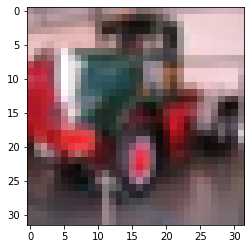

In [243]:
show_example(*train_ds[0])

## DataLoaders

In [244]:
batch_size=128

In [245]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True, generator=g, worker_init_fn=seed_worker)
# Pinned memory is a special kind of memory in the host (CPU) that is never swapped out or moved by the operating system

In [246]:
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True, generator=g, worker_init_fn=seed_worker)
# ? why batch size is different?
# ? why shuffle is not TRUE?

In [247]:
train_dl_aug = DataLoader(train_ds_aug, batch_size, shuffle=True, num_workers=4, pin_memory=True, generator=g, worker_init_fn=seed_worker)
val_dl_aug = DataLoader(val_ds_aug, batch_size*2, num_workers=4, pin_memory=True, generator=g, worker_init_fn=seed_worker)

In [248]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

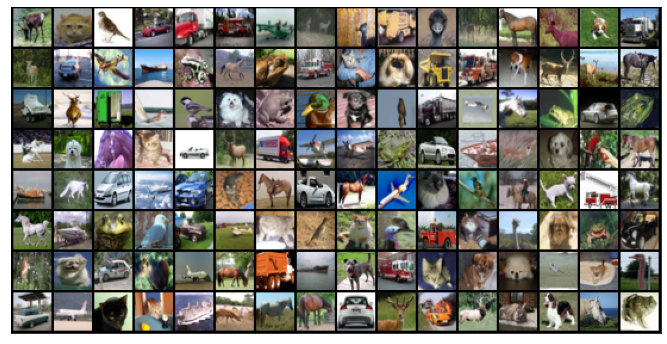

In [249]:
show_batch(train_dl)

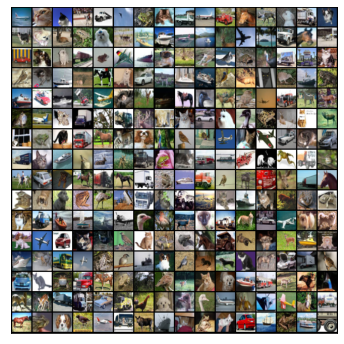

In [250]:
show_batch(val_dl)

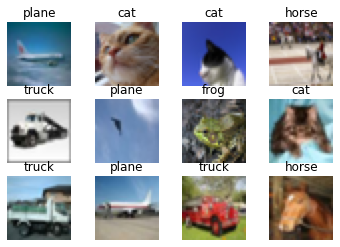

In [251]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

for i in range(0, 12):
    img, label = val_ds[i]
    plt.subplot(3,4,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))

## Model

In [252]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [253]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [254]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [255]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0278, -0.0477,  0.0024, -0.0446, -0.0074, -0.0265, -0.0232, -0.0224,
        -0.0357,  0.0402], grad_fn=<SelectBackward0>)


## Device

In [256]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [257]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [258]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [259]:
device = get_default_device()
device

device(type='cuda')

In [260]:
train_dl = DeviceDataLoader(train_dl, device)

In [261]:
val_dl = DeviceDataLoader(val_dl, device)

In [262]:
to_device(model, device);

In [100]:
train_dl_aug = DeviceDataLoader(train_dl_aug, device)
val_dl_aug = DeviceDataLoader(val_dl_aug, device)

## Train the model

In [263]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [264]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            
            loss = model.training_step(batch)
            train_losses.append(loss)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [265]:
model = to_device(Cifar10CnnModel(), device)
model2 = to_device(Cifar10CnnModel(), device)
model_kornia=to_device(Cifar10CnnModel(), device)

In [266]:
evaluate(model, val_dl)

{'val_loss': 2.30303955078125, 'val_acc': 0.09989659488201141}

In [107]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [56]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7647, val_loss: 1.4399, val_acc: 0.4706
Epoch [1], train_loss: 1.2625, val_loss: 1.1122, val_acc: 0.5882
Epoch [2], train_loss: 0.9858, val_loss: 0.9061, val_acc: 0.6830
Epoch [3], train_loss: 0.8070, val_loss: 0.8199, val_acc: 0.7113
Epoch [4], train_loss: 0.6647, val_loss: 0.8062, val_acc: 0.7254
Epoch [5], train_loss: 0.5467, val_loss: 0.7329, val_acc: 0.7544
Epoch [6], train_loss: 0.4366, val_loss: 0.7452, val_acc: 0.7573
Epoch [7], train_loss: 0.3383, val_loss: 0.7571, val_acc: 0.7610
Epoch [8], train_loss: 0.2551, val_loss: 0.7881, val_acc: 0.7714
Epoch [9], train_loss: 0.1948, val_loss: 0.9076, val_acc: 0.7627


### reproducibility

In [57]:
history2 = fit(num_epochs, lr, model2, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.8681, val_loss: 1.4924, val_acc: 0.4510
Epoch [1], train_loss: 1.2973, val_loss: 1.1510, val_acc: 0.5877
Epoch [2], train_loss: 1.0135, val_loss: 0.9804, val_acc: 0.6581
Epoch [3], train_loss: 0.8497, val_loss: 0.8506, val_acc: 0.7009
Epoch [4], train_loss: 0.7315, val_loss: 0.8078, val_acc: 0.7172
Epoch [5], train_loss: 0.6234, val_loss: 0.7662, val_acc: 0.7278
Epoch [6], train_loss: 0.5397, val_loss: 0.7456, val_acc: 0.7458
Epoch [7], train_loss: 0.4685, val_loss: 0.7445, val_acc: 0.7509
Epoch [8], train_loss: 0.3890, val_loss: 0.7616, val_acc: 0.7623
Epoch [9], train_loss: 0.3297, val_loss: 0.7994, val_acc: 0.7599


In [108]:
history_aug = fit(num_epochs, lr, model, train_dl_aug, val_dl_aug, opt_func)

Epoch [0], train_loss: 1.8704, val_loss: 1.5689, val_acc: 0.4129
Epoch [1], train_loss: 1.4188, val_loss: 1.2421, val_acc: 0.5405
Epoch [2], train_loss: 1.1846, val_loss: 1.0521, val_acc: 0.6295
Epoch [3], train_loss: 1.0091, val_loss: 0.9411, val_acc: 0.6670
Epoch [4], train_loss: 0.8828, val_loss: 0.8035, val_acc: 0.7139
Epoch [5], train_loss: 0.7916, val_loss: 0.7689, val_acc: 0.7339
Epoch [6], train_loss: 0.7181, val_loss: 0.6772, val_acc: 0.7605
Epoch [7], train_loss: 0.6646, val_loss: 0.7176, val_acc: 0.7558
Epoch [8], train_loss: 0.6257, val_loss: 0.6532, val_acc: 0.7726
Epoch [9], train_loss: 0.5795, val_loss: 0.6105, val_acc: 0.7861


In [267]:
history_aug = fit(num_epochs, lr, model_kornia, train_dl, val_dl, opt_func)

AttributeError: 'list' object has no attribute 'shape'

In [110]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

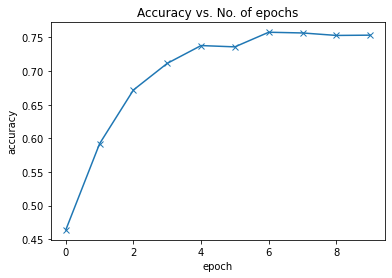

In [74]:
plot_accuracies(history)

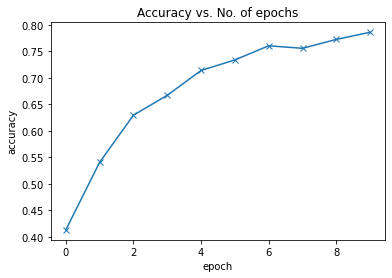

In [111]:
plot_accuracies(history_aug)

In [112]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

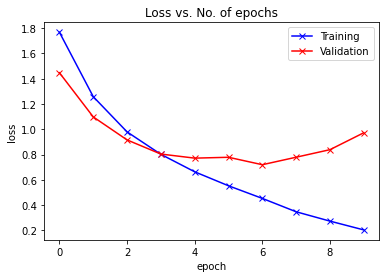

In [76]:
plot_losses(history)

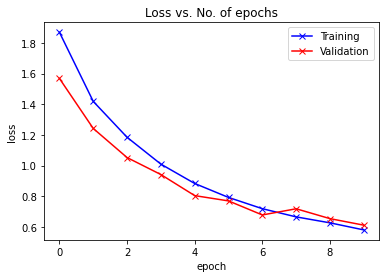

In [113]:
plot_losses(history_aug)

## Test analysis

In [78]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [77]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


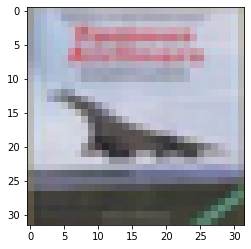

In [79]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: truck


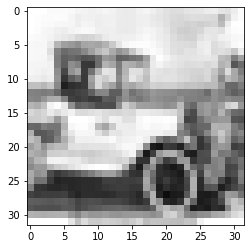

In [80]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


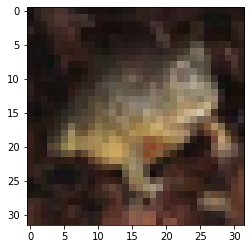

In [81]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [82]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 1.0003304481506348, 'val_acc': 0.7520507574081421}

## Save the model

In [83]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

## Load model

In [84]:
model2 = to_device(Cifar10CnnModel(), device)

In [85]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [86]:
evaluate(model2, test_loader)

{'val_loss': 1.0003304481506348, 'val_acc': 0.7520507574081421}